<a href="https://colab.research.google.com/github/lukeolson/imperial-multigrid/blob/master/lecture-2-mg-ext/other-figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import scipy as sp
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import pyamg

%matplotlib inline

In [42]:
def relaxJ(A, u, f, nu, omega):
    n = A.shape[0]
    unew = u.copy()
    Dinv = sparse.spdiags(1./A.diagonal(), [0], n, n)
    #omega = 4 / 5

    for i in range(nu):
        unew += omega * Dinv * (f - A * unew)

    return unew

def relaxGS(A, u, f, nu):
    n = A.shape[0]
    unew = u.copy()
    
    D = sparse.spdiags(A.diagonal(), [0], A.shape[0], A.shape[1], format='csr')
    E = -sparse.tril(A, -1)
    
    for i in range(nu):
        unew += sla.spsolve(D-E, f - A * unew)

    return unew

def interpolation1d(nc, nf):
    d = np.repeat([[1, 2, 1]], nc, axis=0).T
    I = np.zeros((3,nc), dtype=int)
    for i in range(nc):
        I[:,i] = [2*i, 2*i+1, 2*i+2]
    J = np.repeat([np.arange(nc)], 3, axis=0)
    P = sparse.coo_matrix(
        (d.ravel(), (I.ravel(), J.ravel()))
        ).tocsr()
    return 0.5 * P

def poissonop(n, epsilon=1):
    """
    Create a 2D operator from a stencil.
    """
    #sten = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    sten = pyamg.gallery.diffusion_stencil_2d(epsilon=epsilon, type='FD')
    A = pyamg.gallery.stencil.stencil_grid(sten, (n, n))
    return A

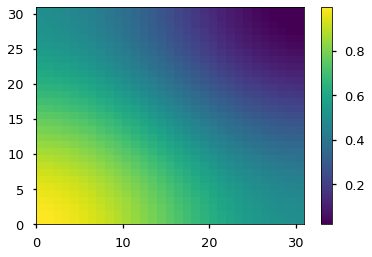

In [23]:
k = 5
n = 2**k - 1
nc = 2**(k-1) - 1
A = poissonop(n, epsilon=1)
#Y, X = np.mgrid[0:1:n*1j,0:1:n*1j]
X, Y = np.meshgrid(np.linspace(0,1,n),
                   np.linspace(0,1,n))
f = np.zeros((n,n)).ravel()
z = np.zeros((n,n))
for k1 in range(1,n+1):
    for k2 in range(1,n+1):
        v = np.outer(np.sin(np.arange(1,n+1) * k1 * np.pi / (n+1)),
                     np.sin(np.arange(1,n+1) * k2 * np.pi / (n+1)))
        v = v.ravel()
        nv0 = np.linalg.norm(v)
        m = 10
        v = relaxJ(A, v, f, m, omega=0.5)
        nv1 = np.linalg.norm(v)
        z[k1-1,k2-1] = (nv1 / nv0)**(1/m)
plt.pcolor(z)
plt.colorbar()
plt.savefig('output-05.pdf')

In [24]:
def totex(A):
    m, n = A.shape
    rstr = "".join(['r' for i in range(n)])
    print('\\left[\\begin{array}{' + rstr + r'}')
    for i in range(m):
        for j in range(n):
            if A[i,j] == 0:
                print(' ', end='')
            else:
                a = A[i,j]
                if float(a) == float(int(a)):
                    a = int(a)
                print(f'{a}', end='')
            if j != (n-1):
                print(' & ', end='')
            else:
                if i != (m-1):
                    print(' \\\\')
                else:
                    print('')
    print('\\end{array}\\right]')

In [30]:
epsilon=1
n=4
sten = pyamg.gallery.diffusion_stencil_2d(epsilon=epsilon, type='FD')
A = pyamg.gallery.stencil.stencil_grid(sten, (n, n))
totex(A.toarray())

\left[\begin{array}{rrrrrrrrrrrrrrrr}
4 & -1 &   &   & -1 &   &   &   &   &   &   &   &   &   &   &   \\
-1 & 4 & -1 &   &   & -1 &   &   &   &   &   &   &   &   &   &   \\
  & -1 & 4 & -1 &   &   & -1 &   &   &   &   &   &   &   &   &   \\
  &   & -1 & 4 &   &   &   & -1 &   &   &   &   &   &   &   &   \\
-1 &   &   &   & 4 & -1 &   &   & -1 &   &   &   &   &   &   &   \\
  & -1 &   &   & -1 & 4 & -1 &   &   & -1 &   &   &   &   &   &   \\
  &   & -1 &   &   & -1 & 4 & -1 &   &   & -1 &   &   &   &   &   \\
  &   &   & -1 &   &   & -1 & 4 &   &   &   & -1 &   &   &   &   \\
  &   &   &   & -1 &   &   &   & 4 & -1 &   &   & -1 &   &   &   \\
  &   &   &   &   & -1 &   &   & -1 & 4 & -1 &   &   & -1 &   &   \\
  &   &   &   &   &   & -1 &   &   & -1 & 4 & -1 &   &   & -1 &   \\
  &   &   &   &   &   &   & -1 &   &   & -1 & 4 &   &   &   & -1 \\
  &   &   &   &   &   &   &   & -1 &   &   &   & 4 & -1 &   &   \\
  &   &   &   &   &   &   &   &   & -1 &   &   & -1 & 4 & -1 &   \\
  &   &  

In [31]:
def interpolation1d(nc, nf):
    d = np.repeat([[1, 2, 1]], nc, axis=0).T
    I = np.zeros((3,nc), dtype=int)
    for i in range(nc):
        I[:,i] = [2*i, 2*i+1, 2*i+2]
    J = np.repeat([np.arange(nc)], 3, axis=0)
    P = sparse.coo_matrix(
        (d.ravel(), (I.ravel(), J.ravel()))
        ).tocsr()
    return 0.5 * P

In [34]:
P = interpolation1d(3, 7)

In [40]:
totex(P)

\left[\begin{array}{rrr}
0.5 &   &   \\
1 &   &   \\
0.5 & 0.5 &   \\
  & 1 &   \\
  & 0.5 & 0.5 \\
  &   & 1 \\
  &   & 0.5
\end{array}\right]


In [41]:
totex(P.T)

\left[\begin{array}{rrrrrrr}
0.5 & 1 & 0.5 &   &   &   &   \\
  &   & 0.5 & 1 & 0.5 &   &   \\
  &   &   &   & 0.5 & 1 & 0.5
\end{array}\right]


In [37]:
P2D = sparse.kron(P, P).tocsr().toarray()

In [39]:
totex(4*P2D)

\left[\begin{array}{rrrrrrrrr}
1 &   &   &   &   &   &   &   &   \\
2 &   &   &   &   &   &   &   &   \\
1 & 1 &   &   &   &   &   &   &   \\
  & 2 &   &   &   &   &   &   &   \\
  & 1 & 1 &   &   &   &   &   &   \\
  &   & 2 &   &   &   &   &   &   \\
  &   & 1 &   &   &   &   &   &   \\
2 &   &   &   &   &   &   &   &   \\
4 &   &   &   &   &   &   &   &   \\
2 & 2 &   &   &   &   &   &   &   \\
  & 4 &   &   &   &   &   &   &   \\
  & 2 & 2 &   &   &   &   &   &   \\
  &   & 4 &   &   &   &   &   &   \\
  &   & 2 &   &   &   &   &   &   \\
1 &   &   & 1 &   &   &   &   &   \\
2 &   &   & 2 &   &   &   &   &   \\
1 & 1 &   & 1 & 1 &   &   &   &   \\
  & 2 &   &   & 2 &   &   &   &   \\
  & 1 & 1 &   & 1 & 1 &   &   &   \\
  &   & 2 &   &   & 2 &   &   &   \\
  &   & 1 &   &   & 1 &   &   &   \\
  &   &   & 2 &   &   &   &   &   \\
  &   &   & 4 &   &   &   &   &   \\
  &   &   & 2 & 2 &   &   &   &   \\
  &   &   &   & 4 &   &   &   &   \\
  &   &   &   & 2 & 2 &   &   &   \\
  &   &